In [224]:
# 1.Data Preparation and Exploration
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [226]:
# importing the dataset
df=pd.read_csv('exchange_rate.csv', parse_dates=['date'],index_col='date')
df.index = pd.to_datetime(df.index,format='mixed')
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [227]:
df.isnull().sum() # checks for missing values

Ex_rate    0
dtype: int64

In [228]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [229]:
df.shape # gives the dimensions of the dataset

(7588, 1)

In [230]:
df.dtypes

Ex_rate    float64
dtype: object

In [231]:
df.nunique()

Ex_rate    5330
dtype: int64

In [234]:
df.describe() # gives the summary statistics

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


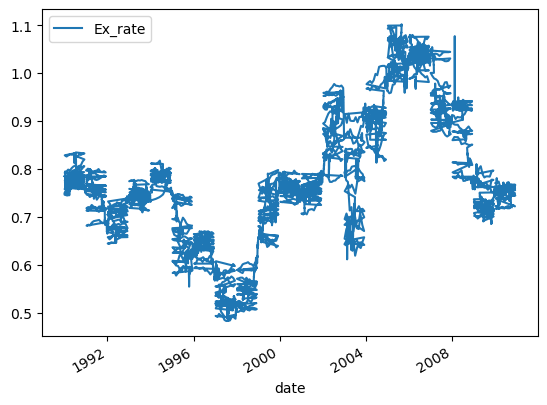

<Figure size 640x480 with 0 Axes>

In [237]:
# Plotting the time series
df.plot()
pyplot.show()
plt.tight_layout()

<Figure size 2400x2000 with 0 Axes>

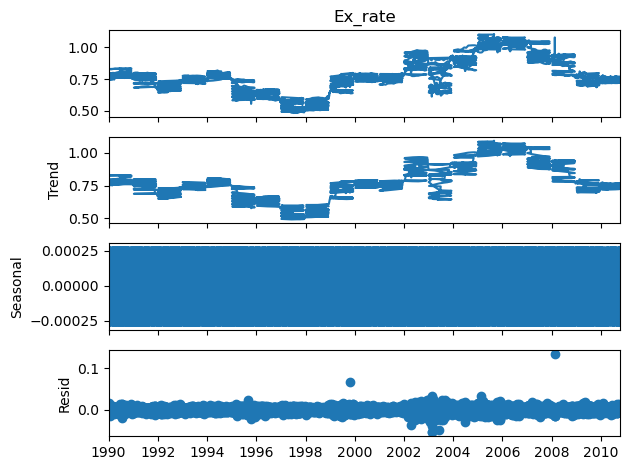

In [240]:
# plot to check trend ,seasonality, residuals
# We can see that there is an change in  Trend. So, Trend is not constant.
# there is no seasonality 
# the data is non stationary
plt.figure(figsize=(24,20))
decompose_ts_add = seasonal_decompose(df.Ex_rate,period= 12)
decompose_ts_add.plot()
plt.show()

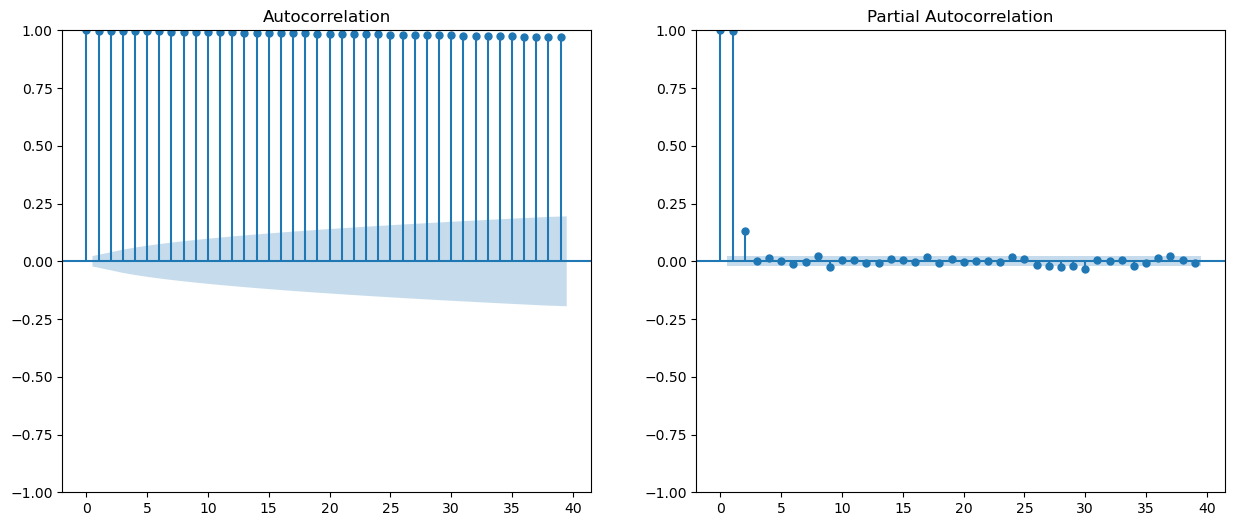

In [241]:
# 2. Model Building - ARIMA
# # Plotting ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

In [243]:
# lets take the Initial ARIMA parameters (p, d, q) based on ACF and PACF plots as p, d, q = 1, 1, 1
p=1
q=1
d=1
# Fitting the ARIMA model
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

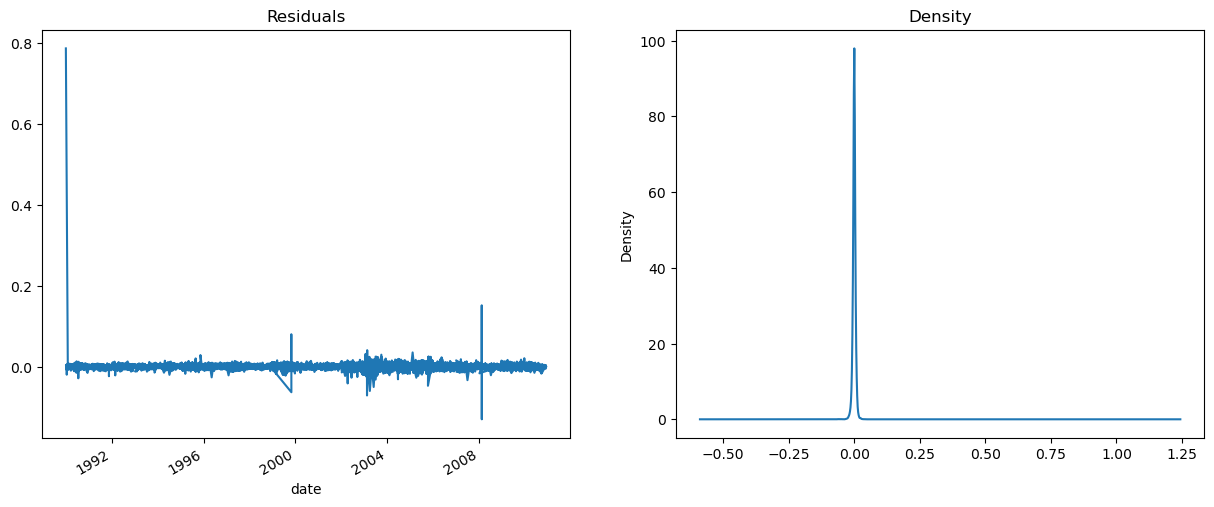

In [245]:
# Plotting residuals
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [246]:
# Forecasting future values
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

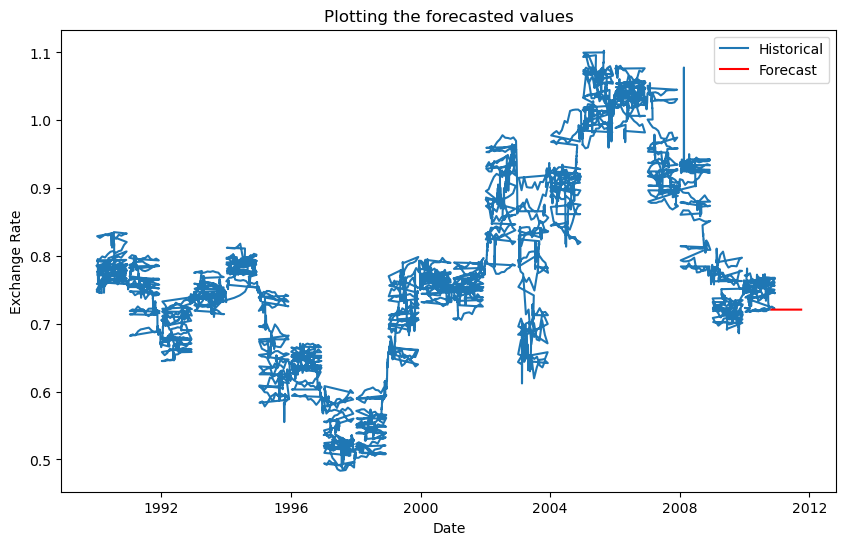

In [247]:
# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('Plotting the forecasted values')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [248]:
# evaluating  ARIMA model
arima_forecast_values = forecast_values[:forecast_steps]
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')

ARIMA MAE: 0.0016644924340379526, RMSE: 0.002000358073451703


In [249]:
# 3. Model Building - Exponential Smoothing
# Fittig Holt's Linear Trend model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result = holt_model.fit()


In [250]:
#  model summary
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Thu, 05 Jun 2025
Box-Cox:                          False   Time:                         13:00:54
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700401                alpha                 True
smoothing_trend             0.0000

In [251]:
#2.	Parameter Optimization:
# Fitting the model with optimized parameters (automatically optimized by statsmodels)
optimized_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
optimized_result = holt_model_optimized.fit()

In [252]:
# Print optimized model summary
print(optimized_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Thu, 05 Jun 2025
Box-Cox:                          False   Time:                         13:00:54
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700401                alpha                 True
smoothing_trend             0.0000

In [253]:
# Model Fitting and Forecasting
holt_forecast = optimized_result.forecast(steps=forecast_steps)

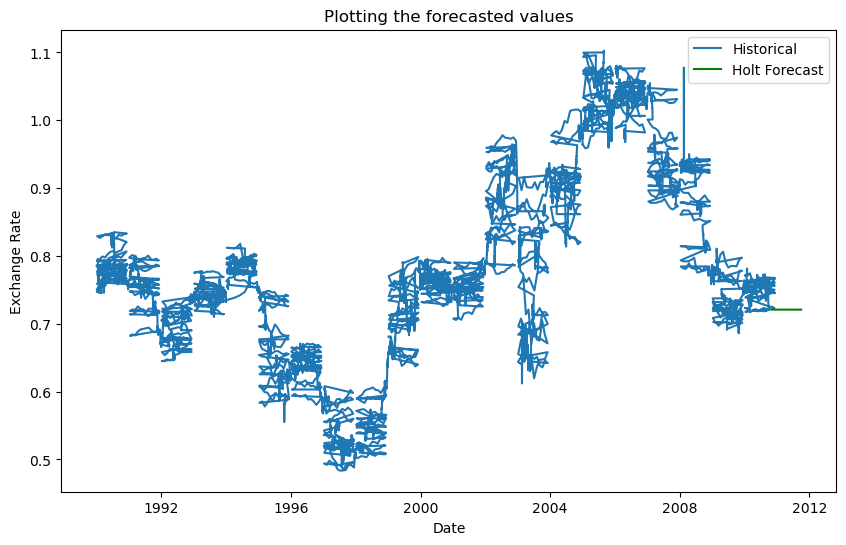

In [272]:
# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, holt_forecast, label='Holt Forecast', color='green')
plt.title('Plotting the forecasted values')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [257]:
 # evaluating holts model
# Compute error metrics for Holt's Linear Trend
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
print(f'Holt MAE: {holt_mae}, RMSE: {holt_rmse}')

Holt MAE: 0.0016726180265766166, RMSE: 0.001997199073838751


In [258]:
# comparing results of two models
eval={"models":pd.Series(["arima_model","holts_model"]),"MAE":pd.Series([arima_mae,holt_mae]),"RMSE_values":pd.Series([arima_rmse,holt_rmse])}
result=pd.DataFrame(eval)
result.sort_values(['RMSE_values'], inplace=True, ignore_index=True)
result

,models,MAE,RMSE_values
0,holts_model,0.001673,0.001997
1,arima_model,0.001664,0.002000


In [ ]:
# ARIMA performs slightly better on average error (MAE).
#Holt's performs slightly better (RMSE).

#ARIMA Strengths:
#Captures complex patterns like autocorrelation and trend.
#Better suited for stationary or differenced series.
#Limitations:
#Needs pre-processing (stationarity checks, differencing).
#More complex parameter tuning (p, d, q)

# Holt’s Model Strengths:
# Effectively models linear trends.
# Requires fewer assumptions than ARIMA.
# Limitations:
# Cannot handle seasonality .
# May underperform if there are autocorrelations or nonlinear trends.

In [ ]:
# conclusion
# Both models performed very similarly, with only minor differences in error values.
# ARIMA had the lowest MAE, indicating slightly better average forecasting accuracy.
# Holt’s model had the lowest RMSE.
# Use ARIMA for final forecasting if you prioritize accuracy and can afford slightly more complexity.
# Holt’s can be a strong baseline model due to its simplicity and competitive performance.